<a href="https://colab.research.google.com/github/rhks13/DART/blob/main/%EB%AA%A8%ED%88%AC_%EC%8B%9C%EA%B3%84%EC%97%B4_%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pickle
import datetime

Mounted at /content/drive


# **데이터 & 라이브러리 준비**

In [ ]:
stock = pd.read_excel('/content/drive/MyDrive/DART/모투/주간 수정주가.xlsx',index_col=0)
amount = pd.read_excel('/content/drive/MyDrive/DART/모투/주간 시총.xlsx', index_col=0)
trade = pd.read_excel('/content/drive/MyDrive/DART/모투/거래대금.xlsx', index_col=0)

In [ ]:
stock = stock.dropna(axis=1)
stock = stock.pct_change().T.dropna(axis=1)
stock

D A T E,2020-10-08,2020-10-16,2020-10-23,2020-10-30,2020-11-06,2020-11-13,2020-11-20,2020-11-27,2020-12-04,2020-12-11,...,2022-08-05,2022-08-12,2022-08-19,2022-08-26,2022-09-02,2022-09-08,2022-09-16,2022-09-23,2022-09-30,2022-10-07
A000020,0.105263,-0.107660,-0.081206,-0.095960,0.022346,0.008197,0.046070,0.010363,-0.025641,-0.028947,...,0.023697,-0.018519,-0.037736,-0.004902,-0.049261,-0.037306,-0.004306,-0.050811,-0.059226,0.060533
A000040,0.125163,0.024334,0.052036,0.016129,0.025397,0.104231,-0.037383,0.247573,0.112840,-0.143357,...,-0.024725,0.004225,-0.002805,-0.015471,-0.055714,-0.066566,-0.027553,-0.106667,0.190299,0.064263
A000050,0.042654,-0.045455,0.042857,-0.018265,0.032558,0.027027,0.035088,0.008475,-0.016807,0.038462,...,0.003802,0.007576,-0.063910,0.016064,-0.019763,0.000000,0.004032,-0.012048,-0.069106,0.013100
A000060,0.081712,-0.021583,0.139706,-0.106452,0.018051,0.049645,0.033784,-0.039216,0.020408,0.023333,...,0.050725,0.030345,0.049531,-0.048469,-0.014745,-0.040816,-0.021277,-0.024638,-0.123328,0.011864
A000070,-0.020312,-0.023923,0.014706,-0.001610,0.017742,0.036450,0.036697,-0.032448,0.003049,0.027356,...,-0.016000,0.031165,-0.034166,-0.063946,-0.020349,0.000000,-0.010386,-0.019490,-0.045872,0.030449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A336370,-0.002548,-0.079927,-0.080001,-0.053979,0.110928,0.106986,0.058004,0.203397,0.036442,0.023427,...,0.079042,0.034406,-0.048283,-0.047351,-0.065089,-0.037975,0.010526,-0.089844,-0.144492,0.045151
A344820,0.048276,-0.034539,0.003407,0.000000,0.039049,0.013072,0.104839,0.064234,0.031550,-0.015957,...,0.033438,0.008089,0.033099,-0.041748,0.043566,-0.047573,-0.033639,-0.060127,-0.103255,0.066333
A353200,0.009390,-0.037209,0.019324,-0.060664,0.180626,-0.068376,-0.041284,0.009569,-0.004739,0.000000,...,0.028120,-0.051282,0.007207,0.025045,0.020942,-0.083761,0.022388,-0.145985,-0.091880,0.141176
A363280,-0.022495,-0.133891,0.106280,-0.111354,0.039312,0.087470,-0.013043,0.033040,0.023454,-0.004167,...,0.024390,0.015873,-0.044271,-0.040872,-0.062500,-0.051515,-0.031949,-0.108911,-0.107407,0.016598


In [ ]:
!pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=7403ccd907338c26982dd73c6393444f14d189c8a4543772042b41005b020ed2
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built minisom


In [ ]:
df = stock.copy()

In [ ]:
# Native libraries
import os
import math
# Essential Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Preprocessing
from sklearn.preprocessing import MinMaxScaler
# Algorithms
from minisom import MiniSom


from sklearn.decomposition import PCA

# **시계열 클러스터링(SOM)**

In [ ]:
som_x = som_y = math.ceil(math.sqrt(math.sqrt(len(df))))
som = MiniSom(som_x, som_y,len(df.values[0]), sigma=0.3, learning_rate = 0.05)
som.random_weights_init(df.values)
som.train(df.values, 10000)

In [ ]:
def plot_som_series_averaged_center(som_x, som_y, win_map):
    fig, axs = plt.subplots(som_x,som_y,figsize=(25,25))
    fig.suptitle('Clusters')
    for x in range(som_x):
        for y in range(som_y):
            cluster = (x,y)
            if cluster in win_map.keys():
                for series in win_map[cluster]:
                    axs[cluster].plot(series,c="gray",alpha=0.5) 
                axs[cluster].plot(np.average(np.vstack(win_map[cluster]),axis=0),c="red")
            cluster_number = x*som_y+y+1
            axs[cluster].set_title(f"Cluster {cluster_number}")

    plt.show()

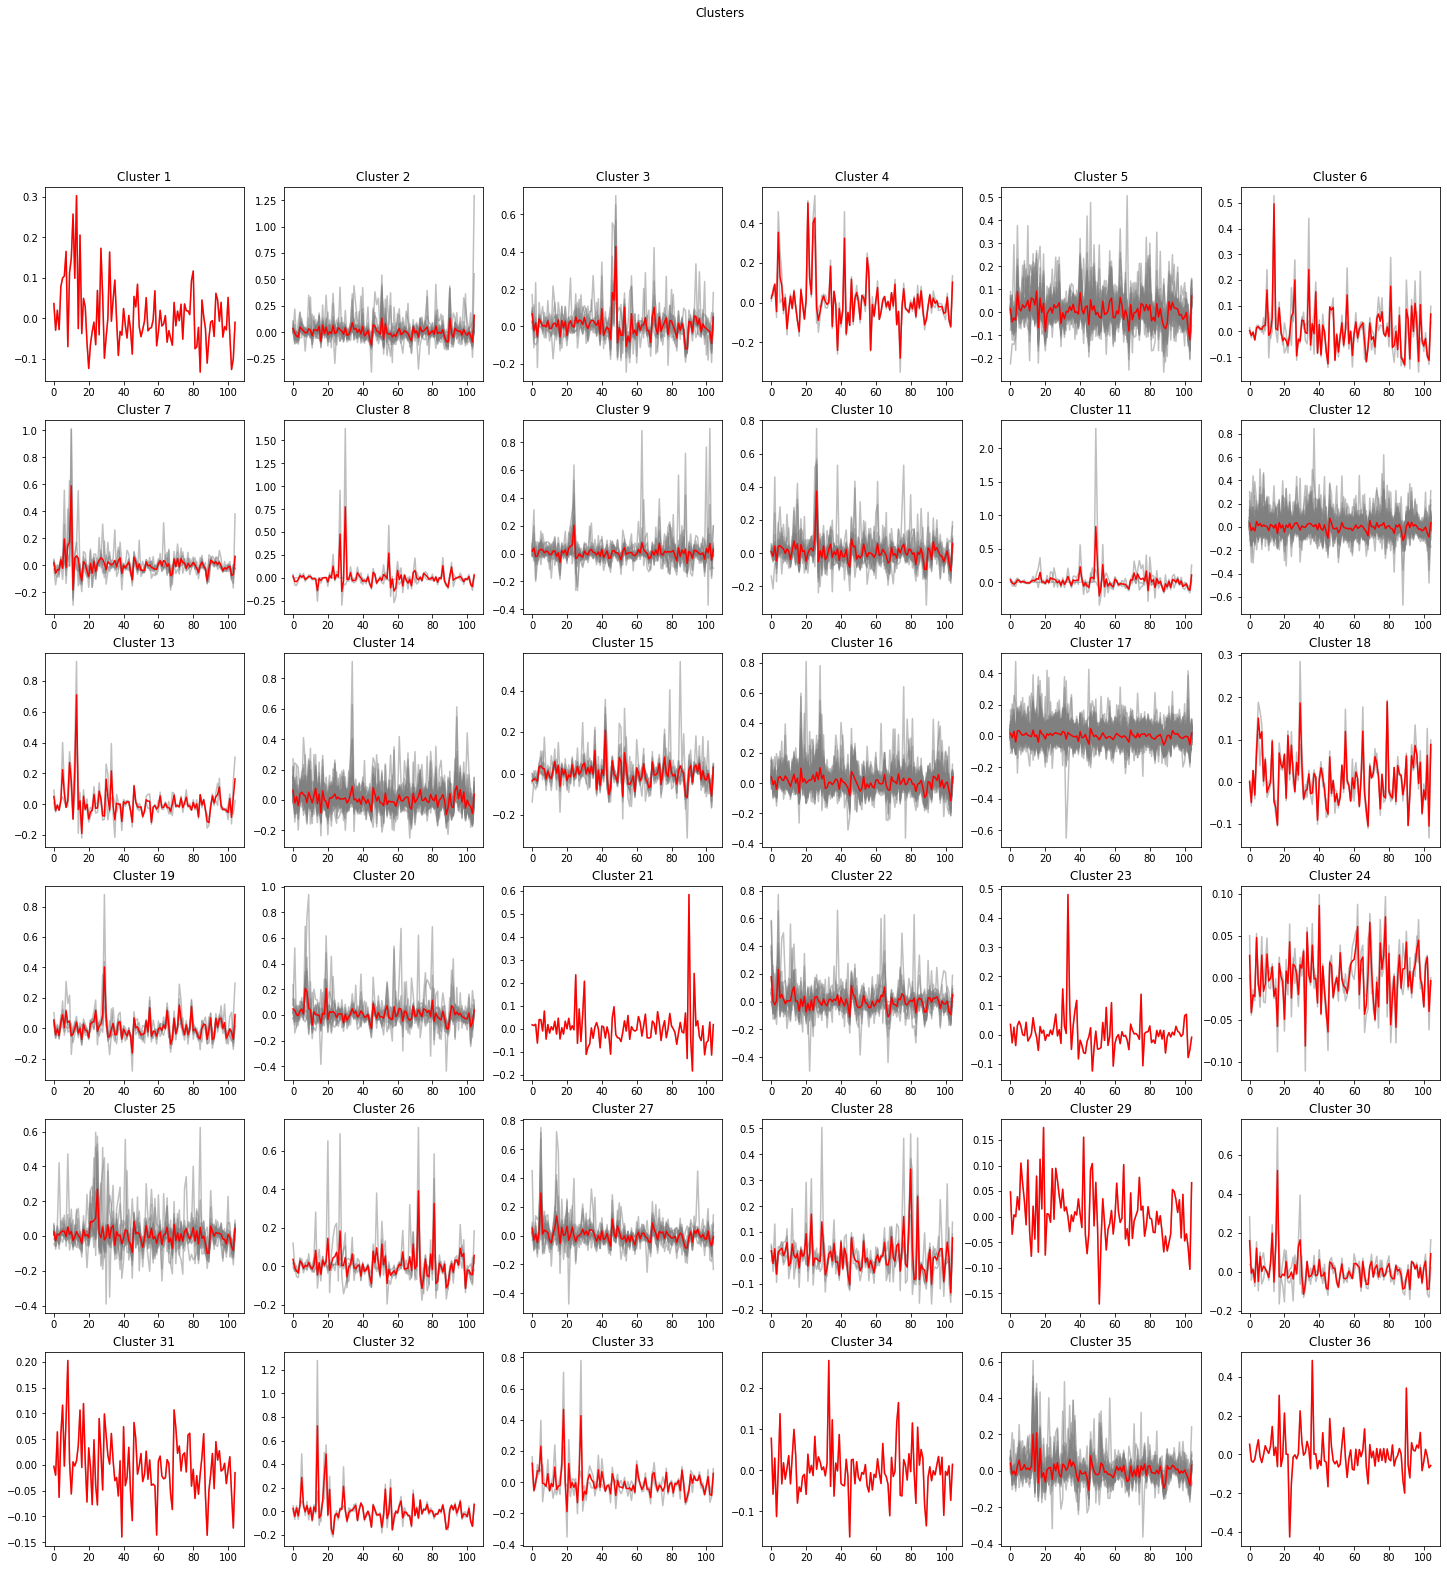

In [ ]:
win_map = som.win_map(df.values)
# Returns the mapping of the winner nodes and inputs
# arithmetic mean을 이용한 매핑
plot_som_series_averaged_center(som_x, som_y, win_map)

In [ ]:
def plot_som_series_dba_center(som_x, som_y, win_map):
    fig, axs = plt.subplots(som_x,som_y,figsize=(10,10))
    fig.suptitle('Clusters')
    for x in range(som_x):
        for y in range(som_y):
            cluster = (x,y)
            if cluster in win_map.keys():
                for series in win_map[cluster]:
                    axs[cluster].plot(series,c="gray",alpha=0.5) 
                axs[cluster].plot(dtw_barycenter_averaging(np.vstack(win_map[cluster])),c="red") # I changed this part
            cluster_number = x*som_y+y+1
            axs[cluster].set_title(f"Cluster {cluster_number}")
    plt.show()

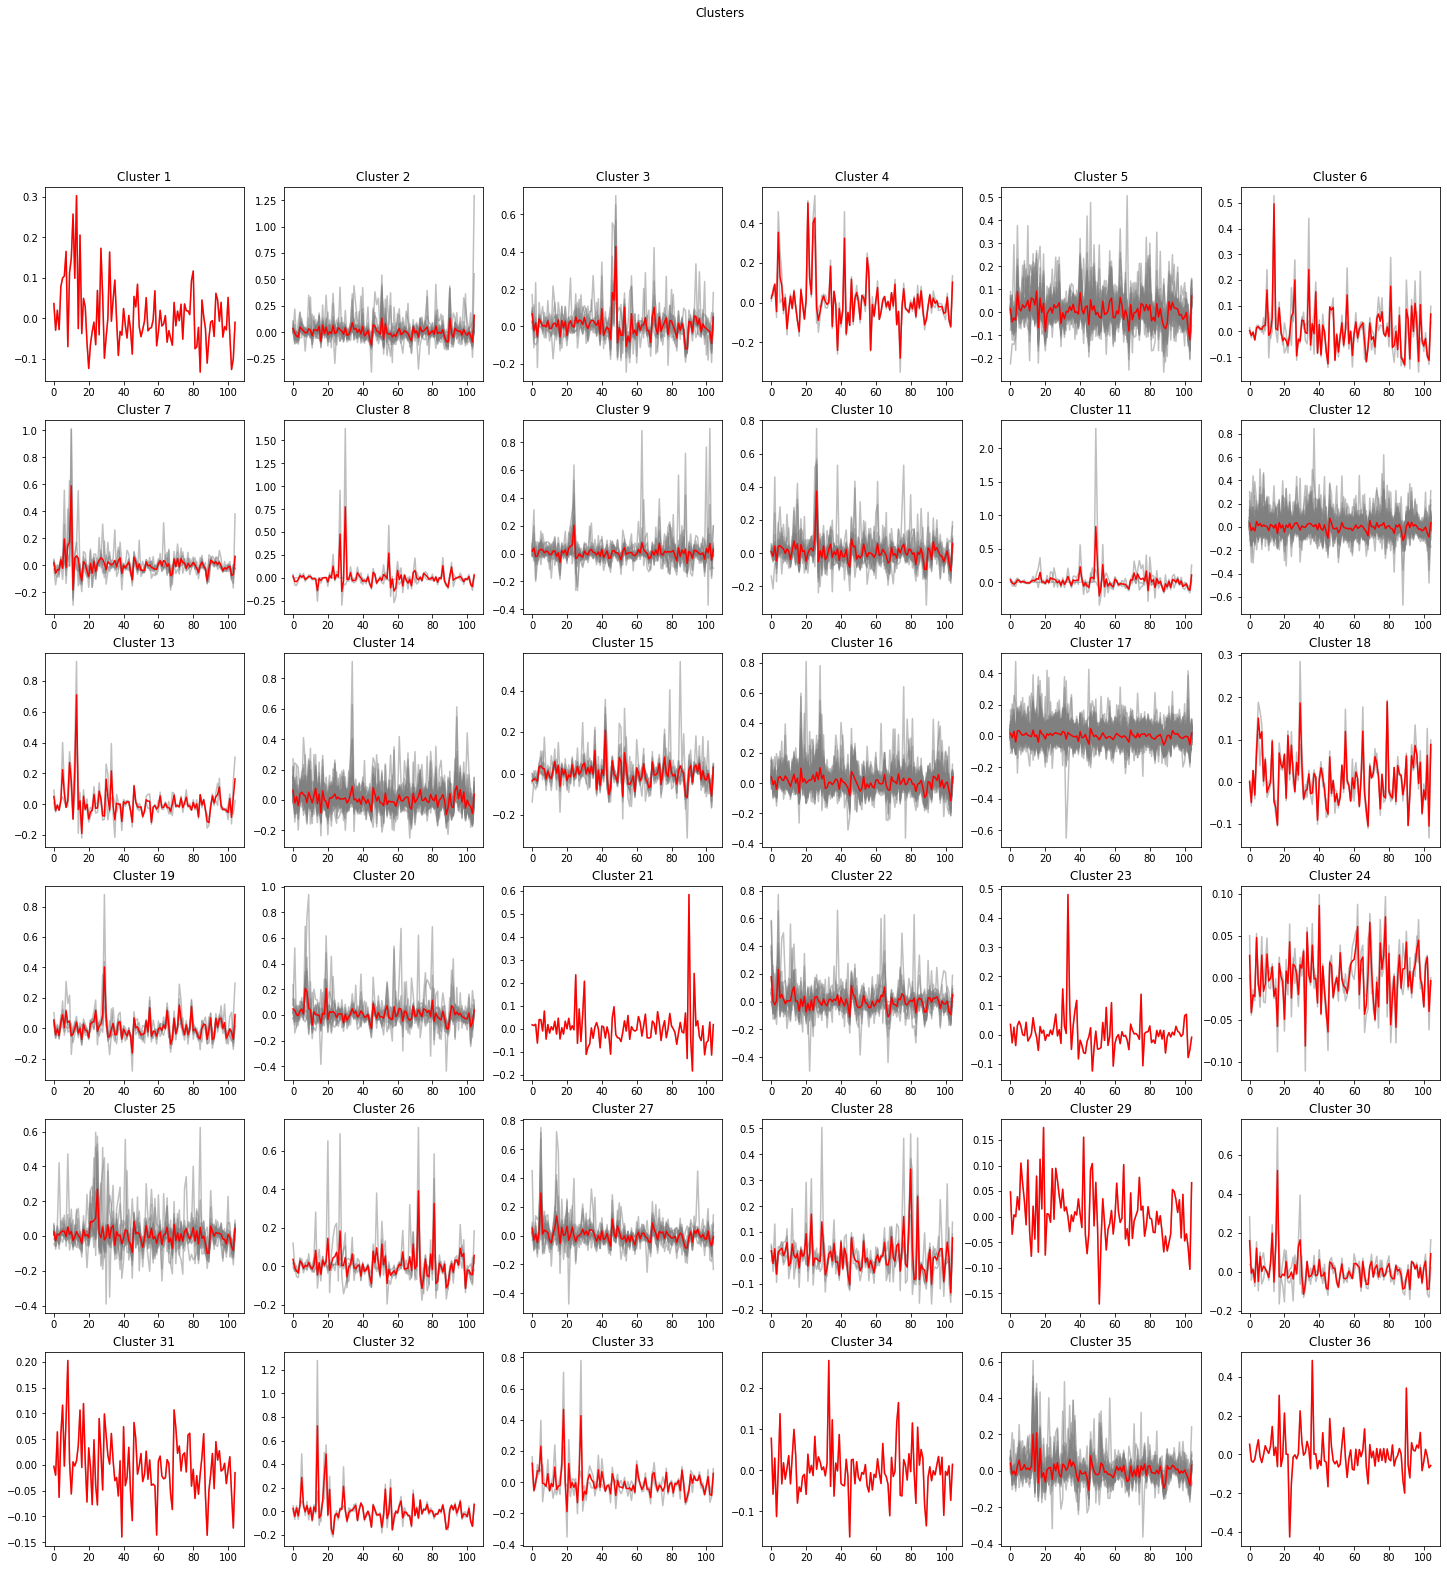

In [ ]:
win_map = som.win_map(df.values)
# Returns the mapping of the winner nodes and inputs
# arithmetic mean을 이용한 매핑
plot_som_series_averaged_center(som_x, som_y, win_map)

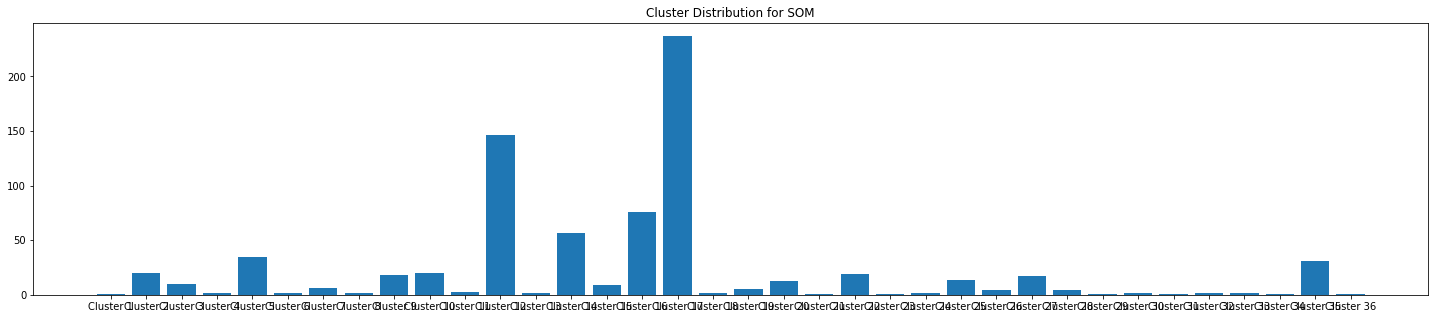

In [ ]:
#cluster dist확인

cluster_c = []
cluster_n = []
for x in range(som_x):
    for y in range(som_y):
        cluster = (x,y)
        if cluster in win_map.keys():
            cluster_c.append(len(win_map[cluster]))
        else:
            cluster_c.append(0)
        cluster_number = x*som_y+y+1
        cluster_n.append(f"Cluster {cluster_number}")

plt.figure(figsize=(25,5))
plt.title("Cluster Distribution for SOM")
plt.bar(cluster_n,cluster_c)
plt.show()

In [ ]:
cluster_map = []
for idx in range(len(df.values)):
    winner_node = som.winner(df.values[idx])
    cluster_map.append((df.index[idx],f"Cluster {winner_node[0]*som_y+winner_node[1]+1}"))
# 클러스터 생성 완료
tscluster=pd.DataFrame(cluster_map,columns=["Series","Cluster"]).set_index("Series")
tscluster

,Cluster
Series,
A000020,Cluster 12
A000040,Cluster 20
A000050,Cluster 17
A000060,Cluster 17
A000070,Cluster 16
...,...
A336370,Cluster 5
A344820,Cluster 29
A353200,Cluster 5


In [ ]:
stock['cluster'] = tscluster

In [ ]:
am = amount.dropna(axis=1)
am

,A000020,A000040,A000050,A000060,A000070,A000080,A000100,A000120,A000140,A000150,...,A316140,A317400,A322000,A326030,A336260,A336370,A344820,A353200,A363280,A900140
D A T E,,,,,,,,,,,,,,,,,,,,,
2020-09-29,610302619500,70304000806,289231098500,1460788000000,548113344000,2542343398750,4292207202000,4049191060000,393354666750,774141669750,...,6197056720140,216938412000,358400000000,12256023625000,2391779590600,1208295441000,242156090000,526290251250,916897053900,180455149670
2020-10-08,674545000500,79103458534,301567970000,1580152000000,536979791700,2644037134700,4392492417000,4197471296000,400316696250,763401177000,...,6254838134780,220420139600,435120000000,11551204375000,2319637746800,1205236465200,253846384000,531231943750,896271557800,220840296480
2020-10-16,601923178500,81028339912,287860335000,1546048000000,524133385200,2661570537450,4151807901000,4129034264000,389873652000,747703533750,...,6074271214030,210242782000,385280000000,12021083875000,2627627926100,1108878727500,245078663500,511465173750,776268671400,183522376010
2020-10-23,553043106000,85244746740,300197206500,1762040000000,531841229100,2461689746100,4038151324000,3821067620000,364346210500,795622655250,...,6659308037260,219081013600,393120000000,12608433250000,2394554276900,1020168429300,245913684500,521348558750,858770655800,280037315480
2020-10-30,499973313000,86619662010,294714152500,1574468000000,530984802000,2349475968500,3977980195000,3638568868000,338818769000,770010711000,...,6420959701870,214260160000,379120000000,12490963375000,2302989629000,965106864900,245913684500,489721726750,763143355700,256419710560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-08,259483356300,59317432905,339949348000,4117270500000,577231865400,1988287871850,4071670065600,2589201044000,264557121000,1191368503500,...,8263487231150,288929774000,856800000000,5340963650000,2246434801800,1334225410000,783353613600,1324373590000,797043044200,275988449175
2022-09-16,258366097500,57683079000,341320111500,4029669000000,571236875700,1981274510750,4093639508400,2475139324000,268038135750,1389654523500,...,8591114478200,295910627600,904960000000,5317469675000,2239885429200,1348269888000,757002268800,1354023745000,771578410200,279966661055
2022-09-23,245238306600,51530217240,337207821000,3828797950000,560103323400,1932180983050,4013084884800,2292640572000,251793400250,1450792713000,...,8700323560550,257128107600,742560000000,4675301025000,2013932074500,1227136265250,711486309600,1156356045000,687545118000,273999343235


In [ ]:
mean_df=pd.DataFrame({'mean':am.mean(),'symbol':am.columns})

In [ ]:
stock

D A T E,2020-10-08 00:00:00,2020-10-16 00:00:00,2020-10-23 00:00:00,2020-10-30 00:00:00,2020-11-06 00:00:00,2020-11-13 00:00:00,2020-11-20 00:00:00,2020-11-27 00:00:00,2020-12-04 00:00:00,2020-12-11 00:00:00,...,2022-08-19 00:00:00,2022-08-26 00:00:00,2022-09-02 00:00:00,2022-09-08 00:00:00,2022-09-16 00:00:00,2022-09-23 00:00:00,2022-09-30 00:00:00,2022-10-07 00:00:00,cluster,symbol
A000020,0.105263,-0.107660,-0.081206,-0.095960,0.022346,0.008197,0.046070,0.010363,-0.025641,-0.028947,...,-0.037736,-0.004902,-0.049261,-0.037306,-0.004306,-0.050811,-0.059226,0.060533,Cluster 12,A000020
A000040,0.125163,0.024334,0.052036,0.016129,0.025397,0.104231,-0.037383,0.247573,0.112840,-0.143357,...,-0.002805,-0.015471,-0.055714,-0.066566,-0.027553,-0.106667,0.190299,0.064263,Cluster 20,A000040
A000050,0.042654,-0.045455,0.042857,-0.018265,0.032558,0.027027,0.035088,0.008475,-0.016807,0.038462,...,-0.063910,0.016064,-0.019763,0.000000,0.004032,-0.012048,-0.069106,0.013100,Cluster 17,A000050
A000060,0.081712,-0.021583,0.139706,-0.106452,0.018051,0.049645,0.033784,-0.039216,0.020408,0.023333,...,0.049531,-0.048469,-0.014745,-0.040816,-0.021277,-0.024638,-0.123328,0.011864,Cluster 17,A000060
A000070,-0.020312,-0.023923,0.014706,-0.001610,0.017742,0.036450,0.036697,-0.032448,0.003049,0.027356,...,-0.034166,-0.063946,-0.020349,0.000000,-0.010386,-0.019490,-0.045872,0.030449,Cluster 16,A000070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A336370,-0.002548,-0.079927,-0.080001,-0.053979,0.110928,0.106986,0.058004,0.203397,0.036442,0.023427,...,-0.048283,-0.047351,-0.065089,-0.037975,0.010526,-0.089844,-0.144492,0.045151,Cluster 5,A336370
A344820,0.048276,-0.034539,0.003407,0.000000,0.039049,0.013072,0.104839,0.064234,0.031550,-0.015957,...,0.033099,-0.041748,0.043566,-0.047573,-0.033639,-0.060127,-0.103255,0.066333,Cluster 29,A344820
A353200,0.009390,-0.037209,0.019324,-0.060664,0.180626,-0.068376,-0.041284,0.009569,-0.004739,0.000000,...,0.007207,0.025045,0.020942,-0.083761,0.022388,-0.145985,-0.091880,0.141176,Cluster 5,A353200
A363280,-0.022495,-0.133891,0.106280,-0.111354,0.039312,0.087470,-0.013043,0.033040,0.023454,-0.004167,...,-0.044271,-0.040872,-0.062500,-0.051515,-0.031949,-0.108911,-0.107407,0.016598,Cluster 12,A363280


In [ ]:
stock['symbol'] = stock.index

In [ ]:
fin=pd.merge(stock, mean_df,how = 'left',on='symbol')

In [ ]:
cluster_mean=fin.groupby('cluster').mean().dropna(axis=1)

In [ ]:
cluster_mean

,2020-10-08 00:00:00,2020-10-16 00:00:00,2020-10-23 00:00:00,2020-10-30 00:00:00,2020-11-06 00:00:00,2020-11-13 00:00:00,2020-11-20 00:00:00,2020-11-27 00:00:00,2020-12-04 00:00:00,2020-12-11 00:00:00,...,2022-08-12 00:00:00,2022-08-19 00:00:00,2022-08-26 00:00:00,2022-09-02 00:00:00,2022-09-08 00:00:00,2022-09-16 00:00:00,2022-09-23 00:00:00,2022-09-30 00:00:00,2022-10-07 00:00:00,mean
cluster,,,,,,,,,,,,,,,,,,,,,
Cluster 1,0.036232,-0.029720,0.019820,-0.028269,0.078182,0.099494,0.104294,0.165278,-0.070322,0.112821,...,0.039252,-0.046763,-0.020755,-0.028902,0.051587,-0.041509,-0.126969,-0.100338,-0.010025,9.924481e+11
Cluster 10,0.008555,-0.018784,0.042934,-0.046599,0.040403,0.045681,0.034612,0.025422,-0.001693,0.025539,...,0.007841,-0.014984,-0.018123,-0.051995,-0.020441,0.012966,-0.058554,-0.107098,0.058916,2.554396e+11
Cluster 11,0.033324,-0.013190,-0.029407,-0.010981,0.034210,0.023063,-0.000535,0.010566,0.005529,-0.009469,...,0.047277,-0.029469,0.018968,-0.064390,-0.046375,-0.025531,-0.093832,-0.119391,0.108995,8.177044e+11
Cluster 12,0.033359,-0.031089,-0.005553,-0.034500,0.047187,0.011202,0.029820,0.003503,0.017300,0.007184,...,0.005411,-0.019325,-0.017448,-0.033698,-0.021460,-0.000966,-0.053142,-0.087037,0.036965,1.196013e+12
Cluster 13,0.049863,-0.041304,-0.005812,-0.039100,0.025043,0.224679,0.067441,-0.020250,0.023196,0.270714,...,-0.013317,-0.032588,-0.033356,-0.040515,-0.053481,0.037448,-0.085113,0.045418,0.164663,3.005940e+11
Cluster 14,0.064715,-0.019703,0.021797,-0.036622,0.039212,0.051874,0.036587,0.028028,-0.017600,0.051963,...,0.068169,-0.013951,0.053975,-0.053533,-0.000318,-0.031364,-0.042771,-0.088110,0.037393,1.743378e+12
Cluster 15,-0.035667,-0.025076,-0.027112,-0.036735,0.031704,0.036450,0.024872,0.022151,-0.026897,0.012400,...,0.049544,-0.030109,0.014282,-0.027447,-0.031169,-0.000637,-0.049176,-0.108376,0.029373,1.838621e+11
Cluster 16,0.042139,-0.010788,0.015713,-0.040969,0.036080,0.044340,0.024388,0.017379,0.047607,0.030812,...,0.057248,-0.024705,0.020117,-0.034772,-0.002439,0.007809,-0.048839,-0.117275,0.040953,1.092505e+12
Cluster 17,0.016985,-0.010314,0.029472,-0.038448,0.031903,0.033383,0.014352,0.004568,0.008019,0.018519,...,0.015603,-0.004152,-0.011425,-0.015720,-0.004274,-0.001713,-0.007864,-0.056653,0.019538,4.845350e+12


In [ ]:
cluster_mean.iloc[:,:-1]

,2020-10-08,2020-10-16,2020-10-23,2020-10-30,2020-11-06,2020-11-13,2020-11-20,2020-11-27,2020-12-04,2020-12-11,...,2022-08-05,2022-08-12,2022-08-19,2022-08-26,2022-09-02,2022-09-08,2022-09-16,2022-09-23,2022-09-30,2022-10-07
cluster,,,,,,,,,,,,,,,,,,,,,
Cluster 1,0.036232,-0.029720,0.019820,-0.028269,0.078182,0.099494,0.104294,0.165278,-0.070322,0.112821,...,-0.007421,0.039252,-0.046763,-0.020755,-0.028902,0.051587,-0.041509,-0.126969,-0.100338,-0.010025
Cluster 10,0.008555,-0.018784,0.042934,-0.046599,0.040403,0.045681,0.034612,0.025422,-0.001693,0.025539,...,0.033184,0.007841,-0.014984,-0.018123,-0.051995,-0.020441,0.012966,-0.058554,-0.107098,0.058916
Cluster 11,0.033324,-0.013190,-0.029407,-0.010981,0.034210,0.023063,-0.000535,0.010566,0.005529,-0.009469,...,0.000235,0.047277,-0.029469,0.018968,-0.064390,-0.046375,-0.025531,-0.093832,-0.119391,0.108995
Cluster 12,0.033359,-0.031089,-0.005553,-0.034500,0.047187,0.011202,0.029820,0.003503,0.017300,0.007184,...,0.019976,0.005411,-0.019325,-0.017448,-0.033698,-0.021460,-0.000966,-0.053142,-0.087037,0.036965
Cluster 13,0.049863,-0.041304,-0.005812,-0.039100,0.025043,0.224679,0.067441,-0.020250,0.023196,0.270714,...,0.110684,-0.013317,-0.032588,-0.033356,-0.040515,-0.053481,0.037448,-0.085113,0.045418,0.164663
Cluster 14,0.064715,-0.019703,0.021797,-0.036622,0.039212,0.051874,0.036587,0.028028,-0.017600,0.051963,...,0.009582,0.068169,-0.013951,0.053975,-0.053533,-0.000318,-0.031364,-0.042771,-0.088110,0.037393
Cluster 15,-0.035667,-0.025076,-0.027112,-0.036735,0.031704,0.036450,0.024872,0.022151,-0.026897,0.012400,...,0.008602,0.049544,-0.030109,0.014282,-0.027447,-0.031169,-0.000637,-0.049176,-0.108376,0.029373
Cluster 16,0.042139,-0.010788,0.015713,-0.040969,0.036080,0.044340,0.024388,0.017379,0.047607,0.030812,...,0.018246,0.057248,-0.024705,0.020117,-0.034772,-0.002439,0.007809,-0.048839,-0.117275,0.040953
Cluster 17,0.016985,-0.010314,0.029472,-0.038448,0.031903,0.033383,0.014352,0.004568,0.008019,0.018519,...,0.010667,0.015603,-0.004152,-0.011425,-0.015720,-0.004274,-0.001713,-0.007864,-0.056653,0.019538


In [ ]:
cluster_mean.iloc[:,:-1].T.mean()

cluster
Cluster 1     0.006182
Cluster 10    0.004299
Cluster 11    0.017119
Cluster 12   -0.002715
Cluster 13    0.009313
Cluster 14    0.004116
Cluster 15   -0.001227
Cluster 16    0.004620
Cluster 17    0.000787
Cluster 18    0.008038
Cluster 19    0.005186
Cluster 2     0.003278
Cluster 20    0.006516
Cluster 21    0.004231
Cluster 22    0.001851
Cluster 23    0.005596
Cluster 24    0.000594
Cluster 25    0.005362
Cluster 26    0.008885
Cluster 27    0.004011
Cluster 28    0.006721
Cluster 29    0.005132
Cluster 3     0.006067
Cluster 30    0.006749
Cluster 31   -0.001183
Cluster 32    0.010165
Cluster 33   -0.000614
Cluster 34    0.000604
Cluster 35    0.003599
Cluster 36    0.001717
Cluster 4     0.006075
Cluster 5     0.004825
Cluster 6     0.006614
Cluster 7     0.004113
Cluster 8     0.003877
Cluster 9     0.006300
dtype: float64

In [ ]:
amean=cluster_mean.iloc[:,-1]

In [ ]:
amean.std()

1401183235531.556

In [ ]:
clumean=(amean - amean.mean())/amean.std()+3

In [ ]:
vol=cluster_mean.iloc[:,:-1].T.std()

In [ ]:
cluvol=(vol-vol.mean()) / vol.std()+3

In [ ]:
ranking=pd.DataFrame({'cluvol':vol,'amount':amean,'profit_mean':cluster_mean.iloc[:,:-1].T.mean()})

In [ ]:
ranking['rank1'] = ranking['cluvol'].rank()
ranking['rank2'] = ranking['amount'].rank()
ranking['rank3'] = ranking['profit_mean'].rank(ascending=False)
ranking['fin'] = ranking['rank1']*0.5+ranking['rank2']*0.3+ranking['rank3']*0.2

In [ ]:
ranking.sort_values('fin')

,cluvol,amount,profit_mean,rank1,rank2,rank3,fin
cluster,,,,,,,
Cluster 9,0.033446,1.952626e+11,0.006300,4.0,12.0,10.0,7.6
Cluster 2,0.046348,1.392826e+11,0.003278,9.0,7.0,27.0,12.0
Cluster 20,0.052103,2.139195e+11,0.006516,14.0,13.0,9.0,12.7
Cluster 28,0.066547,1.141685e+11,0.006721,22.0,2.0,7.0,13.0
Cluster 25,0.048105,3.352628e+11,0.005362,10.0,19.0,15.0,13.7
Cluster 3,0.064449,1.228033e+11,0.006067,20.0,5.0,13.0,14.1
Cluster 16,0.038788,1.092505e+12,0.004620,7.0,27.0,19.0,15.4
Cluster 26,0.071756,1.597300e+11,0.008885,24.0,9.0,4.0,15.5
Cluster 10,0.053422,2.554396e+11,0.004299,15.0,15.0,20.0,16.0


In [ ]:
stock[stock['cluster']=='Cluster 9']

D A T E,2020-10-08 00:00:00,2020-10-16 00:00:00,2020-10-23 00:00:00,2020-10-30 00:00:00,2020-11-06 00:00:00,2020-11-13 00:00:00,2020-11-20 00:00:00,2020-11-27 00:00:00,2020-12-04 00:00:00,2020-12-11 00:00:00,...,2022-08-19 00:00:00,2022-08-26 00:00:00,2022-09-02 00:00:00,2022-09-08 00:00:00,2022-09-16 00:00:00,2022-09-23 00:00:00,2022-09-30 00:00:00,2022-10-07 00:00:00,cluster,symbol
A000760,0.032028,-0.013793,0.055944,-0.019868,-0.006757,0.040816,-0.013072,0.006623,-0.013158,0.006667,...,-0.027864,-0.006369,0.012821,-0.003165,0.019048,0.006231,-0.046440,-0.009740,Cluster 9,A000760
A000950,0.024299,0.313869,-0.200000,-0.067708,-0.033520,0.159923,0.021595,0.009756,-0.001610,-0.008065,...,-0.001852,0.102041,0.101010,-0.001529,0.130168,0.140921,-0.179335,0.043415,Cluster 9,A000950
A002420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.033934,-0.042810,-0.044725,0.006002,-0.029833,-0.022140,-0.035220,-0.014342,Cluster 9,A002420
A002840,0.018692,0.000000,-0.001019,-0.002041,0.002045,0.102041,-0.009259,-0.018692,0.038095,0.018349,...,0.002778,-0.008310,-0.022346,-0.002857,-0.005731,0.014409,-0.051136,0.014970,Cluster 9,A002840
A003010,0.053892,-0.009470,0.009560,-0.051136,0.075848,0.012987,-0.031136,0.007561,0.030019,-0.007286,...,-0.068922,-0.018843,-0.058985,-0.023324,0.083582,-0.115702,-0.101246,0.051993,Cluster 9,A003010
A003780,-0.020311,0.103659,-0.062983,-0.042453,0.059113,0.011628,0.070115,-0.010741,0.044517,0.018711,...,-0.050715,-0.020548,-0.081119,-0.022831,0.074766,0.007246,-0.027338,0.031065,Cluster 9,A003780
A006370,0.072655,0.001232,0.009840,0.084044,0.025843,0.020811,0.142704,0.061033,-0.017699,0.000000,...,0.013889,0.000000,-0.018265,-0.023256,-0.028571,-0.004902,-0.015764,0.006006,Cluster 9,A006370
A006880,0.017021,-0.016736,-0.014184,-0.023022,0.054492,0.043296,0.014726,0.018470,0.007772,-0.007712,...,0.041041,0.052885,-0.163470,0.001092,-0.035987,-0.033937,-0.025761,0.076923,Cluster 9,A006880
A007540,0.029319,-0.054934,-0.001076,-0.045259,0.053047,0.037513,-0.014463,0.013627,-0.015512,-0.009454,...,0.009506,-0.011299,-0.103810,-0.021254,-0.022801,-0.001111,0.054505,0.200422,Cluster 9,A007540
A010580,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.764706,-0.370370,0.350000,-0.082789,-0.106888,Cluster 9,A010580


In [ ]:
stock[stock['cluster']=='Cluster 2']

D A T E,2020-10-08 00:00:00,2020-10-16 00:00:00,2020-10-23 00:00:00,2020-10-30 00:00:00,2020-11-06 00:00:00,2020-11-13 00:00:00,2020-11-20 00:00:00,2020-11-27 00:00:00,2020-12-04 00:00:00,2020-12-11 00:00:00,...,2022-08-19 00:00:00,2022-08-26 00:00:00,2022-09-02 00:00:00,2022-09-08 00:00:00,2022-09-16 00:00:00,2022-09-23 00:00:00,2022-09-30 00:00:00,2022-10-07 00:00:00,cluster,symbol
A000910,0.047865,-0.101235,0.005495,-0.113388,-0.013867,0.003125,-0.010903,0.001575,0.023585,-0.018433,...,-0.017378,-0.001608,-0.048309,-0.050761,0.019608,-0.078671,-0.098672,0.077895,Cluster 2,A000910
A001260,0.000000,-0.012871,-0.005015,-0.015121,0.023541,0.000000,0.015000,0.000000,0.000000,0.349754,...,-0.070175,0.051887,0.053812,-0.114894,-0.009615,-0.077670,-0.095789,0.036088,Cluster 2,A001260
A002900,0.043478,-0.027778,-0.075000,0.096525,0.190141,0.050296,-0.022535,-0.043228,-0.021084,0.009231,...,0.016293,0.010020,-0.043651,-0.014523,0.010526,-0.018750,-0.135881,0.063882,Cluster 2,A002900
A004310,0.105175,-0.009063,-0.057927,-0.037217,0.015126,0.046358,0.039557,-0.027397,0.009390,-0.009302,...,-0.046429,-0.009363,-0.062382,-0.042339,-0.010526,-0.067021,0.083238,0.166316,Cluster 2,A004310
A004840,0.010769,0.018265,0.004484,-0.072917,0.081862,-0.008902,0.029940,-0.018895,-0.001481,-0.004451,...,0.001074,-0.012876,-0.008696,-0.021930,0.041480,-0.044133,-0.099099,0.073750,Cluster 2,A004840
A005320,0.032530,-0.089848,-0.021795,-0.098296,0.187500,-0.026928,-0.010063,-0.036849,0.002639,-0.027632,...,-0.115068,-0.009288,-0.059375,-0.069767,-0.014286,-0.086957,-0.123016,0.049774,Cluster 2,A005320
A007610,-0.001845,-0.011091,0.003738,-0.068901,0.040000,0.036538,0.048237,0.047788,0.032095,0.011457,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cluster 2,A007610
A013000,0.019817,-0.029895,-0.104777,-0.018933,0.089474,0.000000,0.012882,-0.003180,-0.009569,0.040258,...,0.032641,-0.025862,-0.103245,0.009868,0.000000,-0.061889,-0.104167,0.077519,Cluster 2,A013000
A017040,-0.010695,0.218919,-0.073171,-0.078947,0.038961,0.042500,-0.021583,0.000000,-0.014706,0.012438,...,-0.055932,0.039497,-0.046632,-0.061594,-0.048263,-0.052738,-0.104925,0.026316,Cluster 2,A017040
A024890,0.006192,-0.030769,0.000000,-0.079365,0.037931,0.046512,-0.009524,0.035256,0.003096,0.135802,...,-0.045814,-0.018212,-0.032040,-0.019164,0.019538,0.182927,-0.237113,0.148649,Cluster 2,A024890


In [ ]:
final_cluster = pd.concat([stock[stock['cluster']=='Cluster 9'],stock[stock['cluster']=='Cluster 2']])

In [ ]:
final_cluster

D A T E,2020-10-08 00:00:00,2020-10-16 00:00:00,2020-10-23 00:00:00,2020-10-30 00:00:00,2020-11-06 00:00:00,2020-11-13 00:00:00,2020-11-20 00:00:00,2020-11-27 00:00:00,2020-12-04 00:00:00,2020-12-11 00:00:00,...,2022-08-19 00:00:00,2022-08-26 00:00:00,2022-09-02 00:00:00,2022-09-08 00:00:00,2022-09-16 00:00:00,2022-09-23 00:00:00,2022-09-30 00:00:00,2022-10-07 00:00:00,cluster,symbol
A000760,0.032028,-0.013793,0.055944,-0.019868,-0.006757,0.040816,-0.013072,0.006623,-0.013158,0.006667,...,-0.027864,-0.006369,0.012821,-0.003165,0.019048,0.006231,-0.046440,-0.009740,Cluster 9,A000760
A000950,0.024299,0.313869,-0.200000,-0.067708,-0.033520,0.159923,0.021595,0.009756,-0.001610,-0.008065,...,-0.001852,0.102041,0.101010,-0.001529,0.130168,0.140921,-0.179335,0.043415,Cluster 9,A000950
A002420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.033934,-0.042810,-0.044725,0.006002,-0.029833,-0.022140,-0.035220,-0.014342,Cluster 9,A002420
A002840,0.018692,0.000000,-0.001019,-0.002041,0.002045,0.102041,-0.009259,-0.018692,0.038095,0.018349,...,0.002778,-0.008310,-0.022346,-0.002857,-0.005731,0.014409,-0.051136,0.014970,Cluster 9,A002840
A003010,0.053892,-0.009470,0.009560,-0.051136,0.075848,0.012987,-0.031136,0.007561,0.030019,-0.007286,...,-0.068922,-0.018843,-0.058985,-0.023324,0.083582,-0.115702,-0.101246,0.051993,Cluster 9,A003010
A003780,-0.020311,0.103659,-0.062983,-0.042453,0.059113,0.011628,0.070115,-0.010741,0.044517,0.018711,...,-0.050715,-0.020548,-0.081119,-0.022831,0.074766,0.007246,-0.027338,0.031065,Cluster 9,A003780
A006370,0.072655,0.001232,0.009840,0.084044,0.025843,0.020811,0.142704,0.061033,-0.017699,0.000000,...,0.013889,0.000000,-0.018265,-0.023256,-0.028571,-0.004902,-0.015764,0.006006,Cluster 9,A006370
A006880,0.017021,-0.016736,-0.014184,-0.023022,0.054492,0.043296,0.014726,0.018470,0.007772,-0.007712,...,0.041041,0.052885,-0.163470,0.001092,-0.035987,-0.033937,-0.025761,0.076923,Cluster 9,A006880
A007540,0.029319,-0.054934,-0.001076,-0.045259,0.053047,0.037513,-0.014463,0.013627,-0.015512,-0.009454,...,0.009506,-0.011299,-0.103810,-0.021254,-0.022801,-0.001111,0.054505,0.200422,Cluster 9,A007540
A010580,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.764706,-0.370370,0.350000,-0.082789,-0.106888,Cluster 9,A010580


In [ ]:
ticker = pd.read_excel('/content/drive/MyDrive/DART/스크리닝 강의/ticker.xlsx', index_col=0)

In [ ]:
ticker = ticker.T
ticker

Symbol,Symbol Name
A005930,삼성전자
A373220,LG에너지솔루션
A000660,SK하이닉스
A207940,삼성바이오로직스
A051910,LG화학
...,...
A025890,한국주강
A008500,일정실업
A071950,코아스
A019490,하이트론


In [ ]:
fin = final_cluster.index     

In [ ]:
ticker.index.isin(fin)    

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
ticker[ticker.index.isin(fin)]

Symbol,Symbol Name
A268280,미원에스씨
A002840,미원상사
A138490,코오롱플라스틱
A002900,TYM
A107590,미원홀딩스
A130660,한전산업
A010580,에스엠벡셀
A053690,한미글로벌
A074610,이엔플러스
A023450,동남합성


미원에스씨 : 페인트, 코팅제, 잉크 등에 사용되는 수지의 원료 만듦

미원상사 : 화학제품 제조 기업

테이팩스 : 점착테이프의 품질개선

대한제당 : 음식료품 제조

백산 : 플라스틱 합성피혁 제조업

대한제분 : 제분 및 식량업체

... => 경공업(식료품업) 위주인듯

In [ ]:
tic =['미원에스씨', '대한제당', '대한제분', '테이팩스', '국동', '백산', '동일고무벨트', '이화산업', '아센디오', '샘표']

In [ ]:
ticker['Symbol Name'].isin(tic).sum()

10

In [ ]:
ticker[ticker['Symbol Name'].isin(tic)]

Symbol,Symbol Name
A268280,미원에스씨
A055490,테이팩스
A001790,대한제당
A035150,백산
A001130,대한제분
A007540,샘표
A163560,동일고무벨트
A012170,아센디오
A005320,국동
A000760,이화산업
